# vizualisation notebook

## data prep

In [2]:
# packages
import numpy as np
import pandas as pd
from tqdm import tqdm
import string
import matplotlib.pyplot as plt

# set style
import seaborn as sns

#set_theme() 
sns.set_theme(style="whitegrid",palette="PuOr_r")

In [17]:
# read data
df_m = pd.read_csv("data/merged_all.csv", dtype={"page_id":str, "ecco_id":str})
print(len(df_m), df_m["ecco_id"].nunique())
df_m.head()
data = df_m[df_m["score_clip"] > 50]

154422 4745


In [18]:
# see head
df_m.head()

,page_allas_url,illustration_id,page_id,illustration_allas_url,ecco_id,page_number,allas_page_url,caption_texts,estc_id,ecco_full_title,...,publication_decade,work_id,publication_place,publication_country,document_type,sub_category,authors,category_clip,score_clip,category_em
0,000170010400180_0.png,000170010400180_0,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_0...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,1780.0,3257-a system of surgery,Edinburgh,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",mechanical,99.316406,Mechanical-Tools
1,000170010400180_1.png,000170010400180_1,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_1...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,1780.0,3257-a system of surgery,Edinburgh,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",other,28.491211,Botanical
2,000170010400370_0.png,000170010400370_0,000170010400370,https://a3s.fi/dhh23-em-illu/000170010400370_0...,0001700104,37.0,https://a3s.fi/dhh23-em-pages/000170010400370.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,1780.0,3257-a system of surgery,Edinburgh,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",mechanical,98.486328,Mechanical-Tools
3,000170010400500_0.png,000170010400500_0,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_0...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,1780.0,3257-a system of surgery,Edinburgh,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",mechanical,91.308594,Mechanical-Tools
4,000170010400500_1.png,000170010400500_1,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_1...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,1780.0,3257-a system of surgery,Edinburgh,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",other,47.436523,Mechanical-Tools


In [19]:
# groupby category to have an overview
df_m.groupby("category_clip").size()

category_clip
anatomy          7069
architecture     2328
botanical       18949
mathematics     79732
mechanical       7101
other           26301
zoological      12942
dtype: int64

In [20]:
# read in the classification results
df_n = pd.read_csv("data/new_clip_classification.csv", dtype={"page_id":str, "ecco_id":str})
df_n=df_n.rename(columns={"Image": "page_allas_url", "Category":"cat","Score":"score"})
df_n.head()

,page_allas_url,cat,score
0,120040010108040_0.png,zoo_1,52.441406
1,042570140003550_0.png,mat_geo_astro,88.623047
2,027900080000910_0.png,mat_geo_astro,99.755859
3,108140010003130_1.png,mat_geo_astro,98.779297
4,014880210003390_1.png,mat_geo_astro,93.896484


In [21]:
# merge clip 2 to old data
df_m=df_m.merge(df_n, on="page_allas_url")

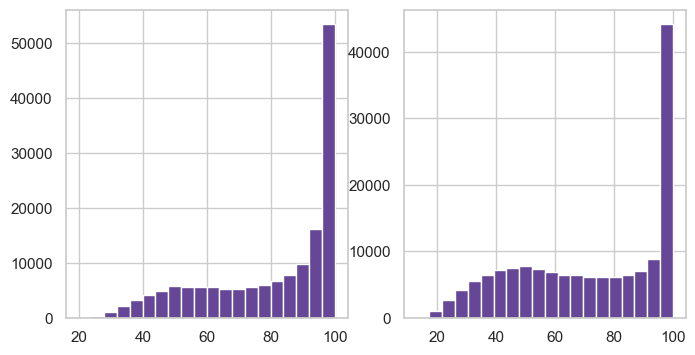

In [22]:
# histogram of the accuracy
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs0=df_m["score_clip"].hist(bins=20, ax=axs[0])
axs1=df_n["score"].hist(bins=20, ax=axs[1])

In [23]:

#botanical sneak peak
df_m[df_m["cat"].isin(["botanical"])].sort_values(by="score").head(20)

,page_allas_url,illustration_id,page_id,illustration_allas_url,ecco_id,page_number,allas_page_url,caption_texts,estc_id,ecco_full_title,...,publication_place,publication_country,document_type,sub_category,authors,category_clip,score_clip,category_em,cat,score
71033,056300010202150_4.png,056300010202150_4,056300010202150,https://a3s.fi/dhh23-em-illu/056300010202150_4...,0563000102,215.0,https://a3s.fi/dhh23-em-pages/056300010202150.png,NaN,T81840,"A new dictionary of natural history; or, compl...",...,London,England,Book,scientificimprovementnaturalhistory,"Mavor, William Fordyce, 1758-1837.",zoological,62.060547,Zoological,botanical,15.539551
107168,088490060000010_2.png,088490060000010_2,088490060000010,https://a3s.fi/dhh23-em-illu/088490060000010_2...,0884900600,1.0,https://a3s.fi/dhh23-em-pages/088490060000010.png,NaN,T66058,Description of the improved achromatic telesco...,...,London,England,Pamphlet,NaN,NaN,other,84.619141,Math-Astro,botanical,15.563965
48539,039490010900340_0.png,039490010900340_0,039490010900340,https://a3s.fi/dhh23-em-illu/039490010900340_0...,0394900109,34.0,https://a3s.fi/dhh23-em-pages/039490010900340.png,NaN,T147671,"English botany; or, coloured figures of Britis...",...,London,England,Book,scientificimprovementnaturalhistory,"Smith, James Edward, Sir, 1759-1828.",other,93.164062,Botanical,botanical,16.247559
49274,039500011600450_0.png,039500011600450_0,039500011600450,https://a3s.fi/dhh23-em-illu/039500011600450_0...,0395000116,45.0,https://a3s.fi/dhh23-em-pages/039500011600450.png,NaN,T147671,"English botany; or, coloured figures of Britis...",...,London,England,Book,scientificimprovementnaturalhistory,"Smith, James Edward, Sir, 1759-1828.",other,43.701172,Botanical,botanical,16.674805
428,001040300000100_0.png,001040300000100_0,001040300000100,https://a3s.fi/dhh23-em-illu/001040300000100_0...,0010403000,10.0,https://a3s.fi/dhh23-em-pages/001040300000100.png,NaN,T61925,Experiments on the insensible perspiration of ...,...,London,England,In-between,scientificimprovementnaturalphilosophy,"Cruickshank, William, 1745-1800.",other,58.886719,Anatomical,botanical,16.833496
78565,062270030200390_0.png,062270030200390_0,062270030200390,https://a3s.fi/dhh23-em-illu/062270030200390_0...,0622700302,39.0,https://a3s.fi/dhh23-em-pages/062270030200390.png,NaN,T26350,"The natural history of British shells, ... By ...",...,London,England,Book,scientificimprovementnaturalhistory,"Donovan, E. (Edward), 1768-1837.",other,41.699219,Zoological,botanical,17.028809
89065,071400020003710_1.png,071400020003710_1,071400020003710,https://a3s.fi/dhh23-em-illu/071400020003710_1...,0714000200,371.0,https://a3s.fi/dhh23-em-pages/071400020003710.png,NaN,T123295,The anatomy of the human body. By W. Cheselden...,...,London,England,Book,scientificimprovementmedicineandanatomy,"Cheselden, William, 1688-1752.",other,62.158203,Anatomical,botanical,17.102051
136336,115830010005930_10.png,115830010005930_10,115830010005930,https://a3s.fi/dhh23-em-illu/115830010005930_1...,1158300100,593.0,https://a3s.fi/dhh23-em-pages/115830010005930.png,By ssus.,T138421,Historia muscorum in qua circiter sexcentæ spe...,...,Oxford,England,Book,scientificimprovementnaturalhistory,"Dillenius, Johann Jakob, 1684-1747.",other,45.092773,Botanical,botanical,17.114258
15490,016480010403930_1.png,016480010403930_1,016480010403930,https://a3s.fi/dhh23-em-illu/016480010403930_1...,0164800104,393.0,https://a3s.fi/dhh23-em-pages/016480010403930.png,C#D,N66478,Essays on physiognomy; calculated to extend th...,...,London,England,Book,scientificimprovementmedicineandanatomy,"Lavater, Johann Caspar, 1741-1801.",other,65.917969,Zoological,botanical,17.260742
115551,097220011200480_1.png,097220011200480_1,097220011200480,https://a3s.fi/dhh23-em-illu/097220011200480_1...,0972200112,48.0,https://a3s.fi/dhh23-em-pages/097220011200480.png,NaN,T208360,"The botanical magazine; or, Flower-Garden Disp...",...,London,England,Book,NaN,NaN,mathematics,88.281250,Botanical,botanical

In [13]:
# score clip threshold ?
df_m.category_em.unique(), df_m.category_clip.unique()

(array(['Mechanical-Tools', 'Botanical', 'Other', 'Anatomical',
        'Zoological', 'Math-Astro', 'Architecture'], dtype=object),
 array(['mechanical', 'other', 'anatomy', 'mathematics', 'architecture',
        'zoological', 'botanical'], dtype=object))

In [36]:
# book categories
cats = list(df_m.sub_category.unique())


## bubble development 

In [25]:
# see the biggest categories of interest
relevant_cats=df_m.dropna(subset=["publication_decade","sub_category"]).groupby(["sub_category"]).size().sort_values(ascending=False).head(7).index
relevant_cats
all_cats=df_m.dropna(subset=["publication_decade","sub_category"]).groupby(["sub_category"]).size().sort_values(ascending=False).index
irrelevant = [c for c in all_cats if c not in relevant_cats]
irrelevant
rename_dict = {c:"other" for c in irrelevant}

In [26]:
df_m["book_category"] = df_m["sub_category"]

df_m=df_m.replace({"book_category": rename_dict})



,page_allas_url,illustration_id,page_id,illustration_allas_url,ecco_id,page_number,allas_page_url,caption_texts,estc_id,ecco_full_title,...,publication_country,document_type,sub_category,authors,category_clip,score_clip,category_em,cat,score,book_category
0,000170010400180_0.png,000170010400180_0,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_0...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",mechanical,99.316406,Mechanical-Tools,mechnanical_tools,73.876953,scientificimprovementmedicineandanatomy
1,000170010400180_1.png,000170010400180_1,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_1...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",other,28.491211,Botanical,agri_garden,42.651367,scientificimprovementmedicineandanatomy
2,000170010400370_0.png,000170010400370_0,000170010400370,https://a3s.fi/dhh23-em-illu/000170010400370_0...,0001700104,37.0,https://a3s.fi/dhh23-em-pages/000170010400370.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",mechanical,98.486328,Mechanical-Tools,mechnanical_tools,89.697266,scientificimprovementmedicineandanatomy
3,000170010400500_0.png,000170010400500_0,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_0...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",mechanical,91.308594,Mechanical-Tools,agri_garden,48.413086,scientificimprovementmedicineandanatomy
4,000170010400500_1.png,000170010400500_1,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_1...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,Scotland,Book,scientificimprovementmedicineandanatomy,"Bell, Benjamin, 1749-1806.",other,47.436523,Mechanical-Tools,architecture,96.435547,scientificimprovementmedicineandanatomy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154417,129490010203670_0.png,129490010203670_0,129490010203670,https://a3s.fi/dhh23-em-illu/129490010203670_0...,1294900102,367.0,https://a3s.fi/dhh23-em-pages/129490010203670.png,NaN,N50716,The elements of navigation; containing the the...,...,England,Book,scientificimprovementgeographycartographyastro...,"Robertson, J. (John), 1712-1776.",mathematics,99.853516,Math-Astro,mat_geo_astro,99.951172,scientificimprovementgeographycartographyastro...
154418,129490010203680_0.png,129490010203680_0,129490010203680,https://a3s.fi/dhh23-em-illu/129490010203680_0...,1294900102,368.0,https://a3s.fi/dhh23-em-pages/129490010203680.png,NaN,N50716,The elements of navigation; containing the the...,...,England,Book,scientificimprovementgeographycartographyastro...,"Robertson, J. (John), 1712-1776.",mathematics,99.511719,Math-Astro,mat_geo_astro,99.853516,scientificimprovementgeographycartographyastro...
154419,129490010204370_0.png,129490010204370_0,129490010204370,https://a3s.fi/dhh23-em-illu/129490010204370_0...,1294900102,437.0,https://a3s.fi/dhh23-em-pages/129490010204370.png,FORTIFICATION.,N50716,The elements of navigation; containing the the...,...,England,Book,scientificimprovementgeographycartographyastro...,"Robertson, J. (John), 1712-1776.",architecture,93.896484,Architecture,architecture,91.894531,scientificimprovementgeographycartographyastro...
154420,129500090000530_0.png,129500090000530_0,129500090000530,https://a3s.fi/dhh23-em-illu/129500090000530_0...,1295000900,53.0,https://a3s.fi/dhh23-em-pages/1295000900005

In [51]:
# rename
df_dec=df_m.groupby(["publication_year","book_category"])["ecco_id"].nunique().reset_index()
df_dec["book_category"]=df_dec["book_category"].apply(lambda x: x.replace("scientificimprovement","") )
df_dec["book_category"]=df_dec["book_category"].apply(lambda x: x.replace("geographycartographyastronomyandnavigation","geo/astro/navigation") )
df_dec["book_category"]=df_dec["book_category"].apply(lambda x: x.replace("practicaltradesmechanicsengineering","practical/engineering") )
df_dec["book_category"]=df_dec["book_category"].apply(lambda x: x.replace("agricultureanimalhusbandry","agriculture/husbandry") )
df_dec["book_category"]=df_dec["book_category"].apply(lambda x: x.replace("medicineandanatomy","medicine/anatomy") )
df_dec["book_category"]=df_dec["book_category"].apply(lambda x: x.replace("naturalhistory","natural history") )
df_dec["book_category"]=df_dec["book_category"].apply(lambda x: x.replace("naturalphilosophy","natural philosophy") )

df_dec.head()

,publication_year,book_category,ecco_id
0,1701.0,other,1
1,1701.0,agriculture/husbandry,1
2,1701.0,geo/astro/navigation,5
3,1701.0,mathematics,6
4,1701.0,medicine/anatomy,9


C:\Users\telmi\AppData\Local\Temp\ipykernel_16840\1232373848.py:6: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax=sns.scatterplot(data=df_dec[df_dec["publication_year"]<1800].sort_values(by="book_category"), x ="publication_year", size="ecco_id", y="book_category", hue="book_category",


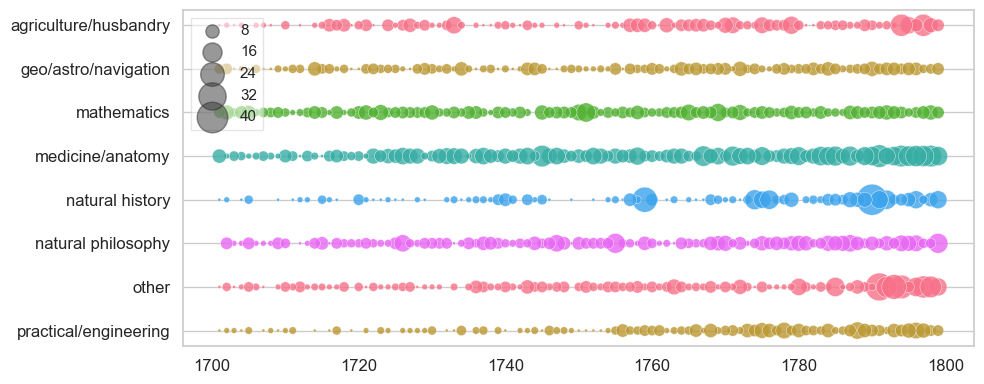

In [84]:
fig, ax= plt.subplots(1,1,figsize=(10,4))

plt.tick_params(axis='y', labelsize=12) # change size
plt.tick_params(axis='x', labelsize=12) # change size

ax=sns.scatterplot(data=df_dec[df_dec["publication_year"]<1800].sort_values(by="book_category"), x ="publication_year", size="ecco_id", y="book_category", hue="book_category",
                  sizes=(5, 500), palette=sns.color_palette("husl"), alpha=0.8)

plt.xlabel("")
plt.ylabel("",fontsize=20) 

h,l = ax.get_legend_handles_labels()

for handle in h:
    handle.set_alpha(0.5)
plt.legend(h[10:],l[10:],loc='upper left', #bbox_to_anchor=(0.5, 
                                           #  0),
           fancybox=False, shadow=False, framealpha=0.5)


fig.tight_layout()
ax.set_ylabel("")

ax.xaxis.grid([])
#fig.savefig("output/timeline_categories_alpha.png",bbox_inches='tight')

## pics per book

In [25]:
df_m.columns

Index(['page_allas_url', 'illustration_id', 'page_id',
       'illustration_allas_url', 'ecco_id', 'page_number', 'allas_page_url',
       'caption_texts', 'estc_id', 'ecco_full_title', 'number_of_pages',
       'language_primary', 'gatherings', 'publication_year',
       'publication_decade', 'work_id', 'publication_place',
       'publication_country', 'document_type', 'sub_category', 'authors',
       'category_clip', 'score_clip', 'category_em', 'n_pics'],
      dtype='object')

In [40]:
# group by book to count the nr of pics in a book
pics_per_book=df_m.groupby(["ecco_id","publication_year"]).size().reset_index(name="n_pics")
print(pics_per_book)
df_m=df_m.merge(pics_per_book, on=["ecco_id","publication_year"])
df_m["proportion"]=df_m["n_pics"] /df_m["number_of_pages"]
df_m.head()

         ecco_id  publication_year  n_pics
0     0001700104            1787.0      49
1     0001700201            1783.0      17
2     0001700202            1783.0      17
3     0001700203            1783.0      19
4     0001700205            1783.0       4
...          ...               ...     ...
4663  1294800500            1794.0      11
4664  1294800700            1800.0       3
4665  1294900101            1764.0     219
4666  1294900102            1764.0      70
4667  1295000900            1746.0       2

[4668 rows x 3 columns]


,page_allas_url,illustration_id,page_id,illustration_allas_url,ecco_id,page_number,allas_page_url,caption_texts,estc_id,ecco_full_title,...,category_clip,score_clip,category_em,cat,score,book_category,n_pics_x,proportion,n_pics_y,n_pics
0,000170010400180_0.png,000170010400180_0,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_0...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,mechanical,99.316406,Mechanical-Tools,mechnanical_tools,73.876953,scientificimprovementmedicineandanatomy,49,0.109131,49,49
1,000170010400180_1.png,000170010400180_1,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_1...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,other,28.491211,Botanical,agri_garden,42.651367,scientificimprovementmedicineandanatomy,49,0.109131,49,49
2,000170010400370_0.png,000170010400370_0,000170010400370,https://a3s.fi/dhh23-em-illu/000170010400370_0...,0001700104,37.0,https://a3s.fi/dhh23-em-pages/000170010400370.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,mechanical,98.486328,Mechanical-Tools,mechnanical_tools,89.697266,scientificimprovementmedicineandanatomy,49,0.109131,49,49
3,000170010400500_0.png,000170010400500_0,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_0...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,mechanical,91.308594,Mechanical-Tools,agri_garden,48.413086,scientificimprovementmedicineandanatomy,49,0.109131,49,49
4,000170010400500_1.png,000170010400500_1,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_1...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,other,47.436523,Mechanical-Tools,architecture,96.435547,scientificimprovementmedicineandanatomy,49,0.109131,49,49


In [41]:
# proportion of pages with picture per decade
dec_prop=df_m.groupby(["sub_category","publication_decade"])["proportion"].mean().reset_index()
dec_prop["sd"]=df_m.groupby(["sub_category","publication_decade"])["proportion"].std().values
dec_prop_cat=dec_prop[dec_prop["sub_category"].isin(cats)]

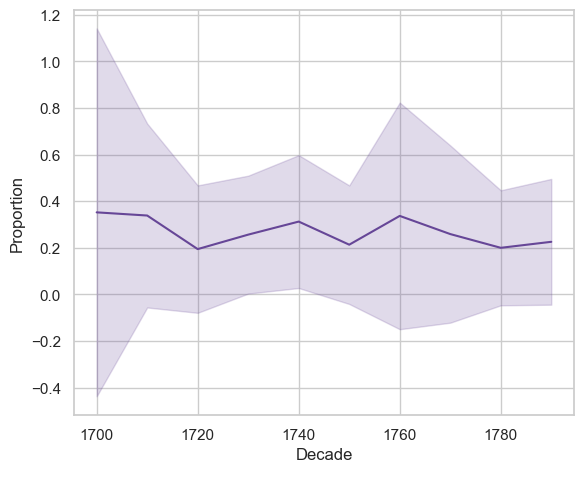

In [42]:
# plot
fig, ax= plt.subplots(1,1,figsize=(6,5))


#ax=sns.scatterplot(data=years[years["publication_year"]<1800], x ="publication_year", y="img_count", hue="Category")
ax=sns.lineplot(data=dec_prop[dec_prop["publication_decade"]<1800], x ="publication_decade", y="proportion", errorbar="sd",
                  sizes=(50, 500))


plt.xlabel("Decade")
plt.ylabel("Proportion")

h,l = ax.get_legend_handles_labels()
plt.legend(h[:],l[:],loc='upper left', bbox_to_anchor=(0, -0.1),
          ncol=1, fancybox=False, shadow=False, frameon=False)

fig.tight_layout()
#fig.savefig("output/prop_pages.png")

## illustrated books

In [43]:
df_y =  pd.read_csv("data/ecco_yearly_aggregates_x_genres_in_sci_module.csv", dtype={"page_id":str, "ecco_id":str})
df_genre=df_y[df_y["sub_category"].isin(cats)]
df_genre.head()

,publication_year,sub_category,n
0,1700,NaN,1
1,1701,artsfineartandaesthetics,2
2,1701,educationadviceliterature,1
3,1701,philosophymoralphilosophy,1
4,1701,philosophypoliticalphilosophy,2


In [45]:
ill_y= df_m.groupby(["sub_category","publication_year"])["ecco_id"].nunique().reset_index()
ill_y

,sub_category,publication_year,ecco_id
0,artsfineartandaesthetics,1710.0,1
1,artsfineartandaesthetics,1711.0,2
2,artsfineartandaesthetics,1713.0,1
3,artsfineartandaesthetics,1715.0,1
4,artsfineartandaesthetics,1725.0,1
...,...,...,...
976,scientificimprovementpracticaltradesmechanicse...,1795.0,10
977,scientificimprovementpracticaltradesmechanicse...,1796.0,12
978,scientificimprovementpracticaltradesmechanicse...,1797.0,10
979,scientificimprovementpracticaltradesmechanicse...,1798.0,6


In [46]:
DF= df_genre.merge(ill_y, on=["sub_category","publication_year"])
DF["proportion"] = DF["ecco_id"]/DF["n"]
DF=DF[DF["sub_category"].isin(cats)]
DF["dec"] = DF['publication_year'].apply(lambda year: year // 10*10)


DF["sub_category"]=DF["sub_category"].apply(lambda x: x.replace("scientificimprovement",""))
dec=DF.groupby(["dec","sub_category"])["proportion"].mean().reset_index()
dec["sd"]=DF.groupby(["dec","sub_category"])["proportion"].std().values


# for the total count
dec_t=DF.groupby(["dec","sub_category"])["ecco_id"].mean().reset_index()
dec_t["sd"]=DF.groupby(["dec","sub_category"])["ecco_id"].std().values

In [47]:
#DF.head()
#dec.head()
df_m[df_m["cat"].isin(["agri_garden"])].sample(10)[["allas_page_url","score","ecco_full_title"]] # microbiology / details of plants etc

,allas_page_url,score,ecco_full_title
118398,https://a3s.fi/dhh23-em-pages/099300010500930.png,89.794922,"The vegetable system. Or, a series of experime..."
59611,https://a3s.fi/dhh23-em-pages/049130040003610.png,46.044922,An introduction to botany: containing an expla...
116290,https://a3s.fi/dhh23-em-pages/097260090000010.png,49.169922,"Lectures in natural philosophy, designed, as a..."
19169,https://a3s.fi/dhh23-em-pages/016700010004880.png,38.500977,A treatise on the theory and practice of midwi...
149561,https://a3s.fi/dhh23-em-pages/129440010000980.png,85.839844,"Flora Britanica: sive, synopsis methodica stir..."
59232,https://a3s.fi/dhh23-em-pages/049030010306040.png,52.197266,Plantarum historiae universalis Oxoniensis seu...
51471,https://a3s.fi/dhh23-em-pages/039520013500990.png,58.837891,"English botany; or, coloured figures of Britis..."
41160,https://a3s.fi/dhh23-em-pages/031830050402620.png,64.648438,"A system of surgery. By Benjamin Bell, Member ..."
53199,https://a3s.fi/dhh23-em-pages/042570140001890.png,37.915039,Euclide's elements; the whole fifteen books co...
104192,https://a3s.fi/dhh23-em-pages/085350050000840.png,51.757812,"Thirty-eight plates, with explanations; intend..."


True True


KeyError: 'agricultureanimalhusbandry'

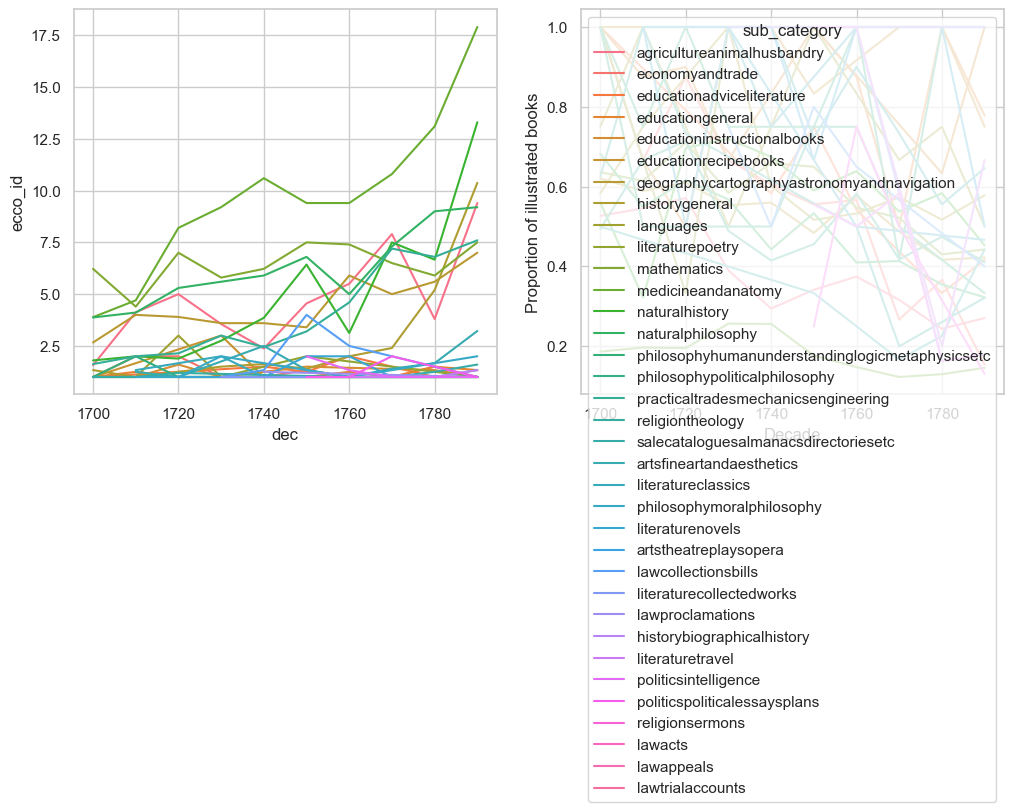

In [48]:
#sns.set_palette("magma")

sns.set_theme(style="whitegrid",palette="Set2")

fig, ax= plt.subplots(1,2,figsize=(12,5))


plot1=sns.lineplot(data=dec_t[dec_t["dec"]<1800], x ="dec", y="ecco_id", hue="sub_category",
                  sizes=(50, 500), ax=ax[0])

plt.xlabel("Proportion of illustrated books")

plt.ylabel("Category")

# proportional
plot2=sns.lineplot(data=dec[dec["dec"]<1800], x ="dec", y="proportion", hue="sub_category",
                  sizes=(50, 500), ax=ax[1])


color_list= {l_:h_.get_color() for h_,l_ in zip(h,l)}
color_list

plt.xlabel("Decade")

plt.ylabel("Proportion of illustrated books")
h,l = ax[0].get_legend_handles_labels()
h1,l1=ax[0].get_legend_handles_labels()
print(h==h1, l==l1)
plot1.legend("", frameon=False)




for c in dec.sub_category.unique():
    temp=dec[(dec["dec"]<1800) & (dec["sub_category"]==c)]
    x_dec= temp["dec"]
    mean=temp["proportion"]
    std= temp["sd"]
    plt.fill_between(x_dec, mean - std, mean + std, color=color_list[c], alpha=0.1)
    
for c in dec_t.sub_category.unique():
    temp=dec_t[(dec_t["dec"]<1800) & (dec_t["sub_category"]==c)]
    x_dec= temp["dec"]
    mean=temp["ecco_id"]
    std= temp["sd"]
    plot1.fill_between(x_dec, mean - std, mean + std, color=color_list[c], alpha=0.1)
    
ax[0].set_ylabel("Nr of books")
ax[1].set_ylabel("Relative proportion")
ax[0].set_xlabel("Decade")
ax[0].set_title("Published illustrated books per year, averaged over decade")
ax[1].set_title("Proportion of illustrated books, averaged over decade")
my_labels= ["agriculture, husbandry","geography, astronomy","mathematics","medicine, anatomy","natural history","natural philosophy","engineering, mechanics"]
plot1.legend(h[:],my_labels,loc='upper left',# bbox_to_anchor=(0, -1),
          ncol=1, fancybox=False, shadow=False)    
plot2.legend("", frameon=False)
fig.tight_layout()
#fig.savefig("output/illustrated_books_2.png")

# format

In [53]:
df_f= df_m[df_m["document_type"]!="Pamphlet"]# filter out pamphlets

In [54]:
# number of publications in each format
# number of pictures in each format + page
# number of reprints
# categories and formats?
# reuse?
print(df_f.columns)
df_f.groupby("gatherings")["ecco_id"].size()#.mean()

Index(['page_allas_url', 'illustration_id', 'page_id',
       'illustration_allas_url', 'ecco_id', 'page_number', 'allas_page_url',
       'caption_texts', 'estc_id', 'ecco_full_title', 'number_of_pages',
       'language_primary', 'gatherings', 'publication_year',
       'publication_decade', 'work_id', 'publication_place',
       'publication_country', 'document_type', 'sub_category', 'authors',
       'category_clip', 'score_clip', 'category_em', 'cat', 'score'],
      dtype='object')


gatherings
12long        6
12mo      13483
16mo        577
18mo         82
24mo         48
2fo       17146
32mo        120
4to       33589
8long        55
8vo       81118
Name: ecco_id, dtype: int64

### first numbers

In [55]:
# number of publications in our dataset per format

n_pubs= df_f.groupby("gatherings")["ecco_id"].nunique()
print(n_pubs)

# nr of pages per format
df_f.groupby("gatherings")["number_of_pages"].mean()

gatherings
12long       1
12mo       602
16mo        16
18mo        12
24mo         2
2fo        180
32mo         5
4to        750
8long        8
8vo       2752
Name: ecco_id, dtype: int64


gatherings
12long    288.000000
12mo      296.915746
16mo      212.228769
18mo      203.939024
24mo       86.333333
2fo       384.702555
32mo       86.008333
4to       437.477567
8long     275.109091
8vo       373.975320
Name: number_of_pages, dtype: float64

In [65]:
# nr of pictures per format
fdf2.groupby(["gatherings"])["pics"].mean()#.sort_values()

gatherings
12long     3.000000
12mo       9.501762
16mo      11.540000
18mo       3.037037
24mo       6.857143
2fo       22.623514
32mo       9.230769
4to       15.666511
8long      3.666667
8vo       11.864754
Name: pics, dtype: float64

<Axes: >

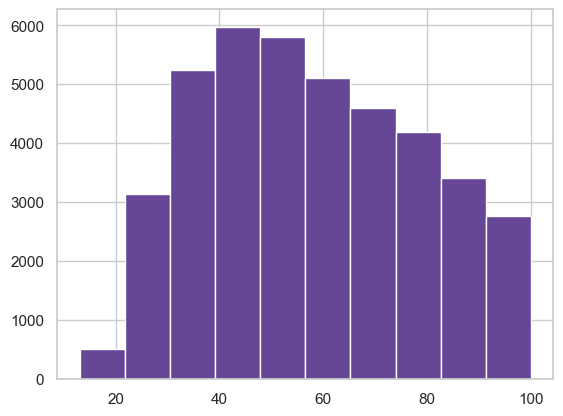

In [67]:
# subset of interesting categories, clip scores

sub = df_f[df_f["cat"].isin(["zoo_1","zoo_2","microbio","anatomy","botanical"])]
sub["score"].hist()

In [77]:
sub[sub["cat"].isin(["anatomy"])].sample(10)[["allas_page_url","score","ecco_full_title"]] # microbiology / details of plants etc

,allas_page_url,score,ecco_full_title
94098,https://a3s.fi/dhh23-em-pages/075950060002090.png,31.518555,"The works of the late Professor Camper, on the..."
31351,https://a3s.fi/dhh23-em-pages/023970010502990.png,54.541016,A new and accurate system of natural history. ...
24045,https://a3s.fi/dhh23-em-pages/020280030005980.png,35.815430,"A system of midwifery, theoretical and practic..."
55627,https://a3s.fi/dhh23-em-pages/046120011300470.png,23.535156,"The botanical Magazine; or, Flower-Garden Disp..."
41077,https://a3s.fi/dhh23-em-pages/031830030000200.png,77.099609,Eight anatomical tables of the human body; con...
19314,https://a3s.fi/dhh23-em-pages/016700050002320.png,94.628906,"Hermanni Boerhaave phil. et med. doctoris, med..."
39997,https://a3s.fi/dhh23-em-pages/030700010110810.png,33.154297,"A medicinal dictionary; including physic, surg..."
139766,https://a3s.fi/dhh23-em-pages/117690014001230.png,37.890625,Philosophical transactions: giving some accomp...
15664,https://a3s.fi/dhh23-em-pages/016490010100330.png,54.736328,Anatomia Britannica: a system of anatomy. Illu...
96399,https://a3s.fi/dhh23-em-pages/076270030302920.png,61.083984,Medical essays and observations. Published by ...


### formats over time

In [163]:

# plot the publications colored by format

# colors

palet=sns.color_palette("tab10", len( plotdata["gatherings"].unique()))
palet
palet_dict= {g:c for g,c in zip(plotdata["gatherings"].unique(),palet)}


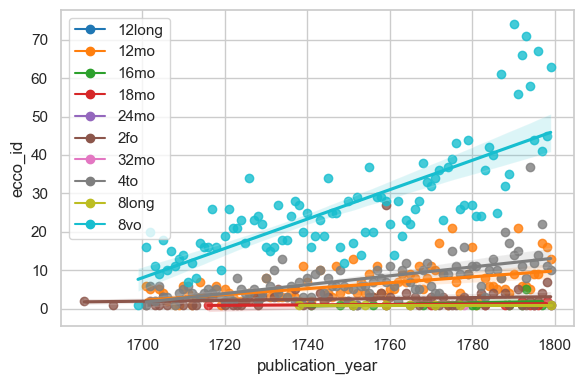

In [173]:
plotdata=df_f.groupby(["gatherings","publication_year"])["ecco_id"].nunique().reset_index()

fig, ax= plt.subplots(1,1,figsize=(6,4))

for c in plotdata["gatherings"].unique():
    plotdata_temp=plotdata[plotdata["gatherings"]==c]
    sns.regplot(data=plotdata_temp[plotdata_temp["publication_year"]<1800], x ="publication_year", y="ecco_id", color=palet_dict[c])#, #hue="gatherings", #size="ecco_id",
               #   sizes=(20, 600))

# Create legend handles and labels from the palet_dict
legend_handles = [plt.Line2D([], [], marker='o', color=palet_dict[label], label=label) for label in palet_dict]
legend_labels = [label for label in palet_dict]

# Add the legend to the plot
ax.legend(handles=legend_handles, labels=legend_labels, loc='best')



fig.tight_layout()

#fig.savefig("output/format_development_regplot.png")

In [137]:
# nr of pages
img_count=df_f.groupby(["ecco_id","number_of_pages","gatherings","publication_year"]).size().reset_index(name="pic_count")

plotdata=df_f.drop_duplicates("ecco_id").groupby(["gatherings","publication_year"])["number_of_pages"].mean().reset_index()#["ecco_id"].nunique().reset_index()
#plotdata["avg_count"]=img_count.values/plotdata["number_of_pages"]
plotdata= plotdata.merge(img_count)
plotdata=img_count.drop_duplicates("ecco_id").groupby(["gatherings","publication_year"])["pic_count"].mean().reset_index()
plotdata.head()

,gatherings,publication_year,pic_count
0,12long,1800.0,6.000000
1,12mo,1701.0,9.666667
2,12mo,1702.0,5.000000
3,12mo,1703.0,9.500000
4,12mo,1704.0,3.200000


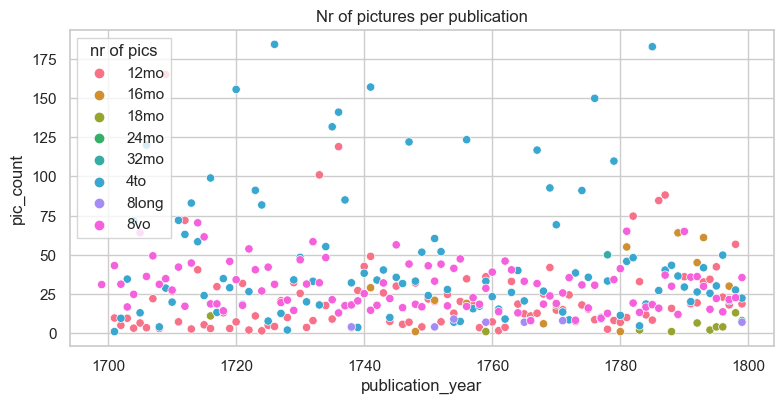

In [150]:
fig, ax= plt.subplots(1,1,figsize=(8,4))

ax=sns.scatterplot(data=plotdata[(plotdata["publication_year"]<1800)&(plotdata["gatherings"]!="2fo")], x ="publication_year", y="pic_count", hue="gatherings", #size="pic_count",
                  sizes=(2, 500))
#("publication_decade","ecco_id",color="document_type")
h,l=ax.get_legend_handles_labels()
ax.legend(h[:], l[:], loc='upper left',title="nr of pics", #bbox_to_anchor=(1.1, 1),
          ncol=1, fancybox=False, shadow=False)  
fig.tight_layout()

ax.set_title("Nr of pictures per publication")
#fig.savefig("output/format_pic_count_scatter_without_folio.png")

### comparing octavos and folios


In [ ]:
# low and high quality



In [189]:
# categories ?
# categories and formats corplot

from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
column_name="num_cat"
# Assuming `plotdata` is your DataFrame and `column_name` is the name of the categorical column
df_f[column_name] = label_encoder.fit_transform(df_f["cat"])
df_f.head()


column_name="num_format"
# Assuming `plotdata` is your DataFrame and `column_name` is the name of the categorical column
df_f[column_name] = label_encoder.fit_transform(df_f["gatherings"])

C:\Users\telmi\AppData\Local\Temp\ipykernel_5632\2477072518.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f[column_name] = label_encoder.fit_transform(df_f["cat"])
C:\Users\telmi\AppData\Local\Temp\ipykernel_5632\2477072518.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f[column_name] = label_encoder.fit_transform(df_f["gatherings"])


Index(['page_allas_url', 'illustration_id', 'page_id',
       'illustration_allas_url', 'ecco_id', 'page_number', 'allas_page_url',
       'caption_texts', 'estc_id', 'ecco_full_title', 'number_of_pages',
       'language_primary', 'gatherings', 'publication_year',
       'publication_decade', 'work_id', 'publication_place',
       'publication_country', 'document_type', 'sub_category', 'authors',
       'category_clip', 'score_clip', 'category_em', 'cat', 'score'],
      dtype='object')


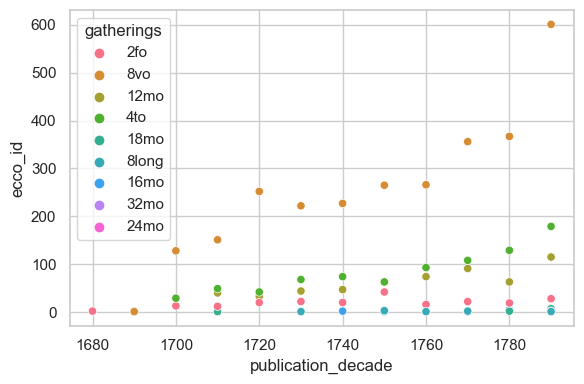

In [56]:
# Ecco ids per format
print(df_m.columns)
fdf= df_m.groupby(["publication_decade","gatherings"])["ecco_id"].nunique().reset_index()
fig, ax= plt.subplots(1,1,figsize=(6,4))

ax=sns.scatterplot(data=fdf[fdf["publication_decade"]<1800], x ="publication_decade", y="ecco_id", hue="gatherings",
                  sizes=(50, 500))
#("publication_decade","ecco_id",color="document_type")
fig.tight_layout()

['mechanical' 'other' 'anatomy' 'mathematics' 'architecture' 'zoological'
 'botanical']


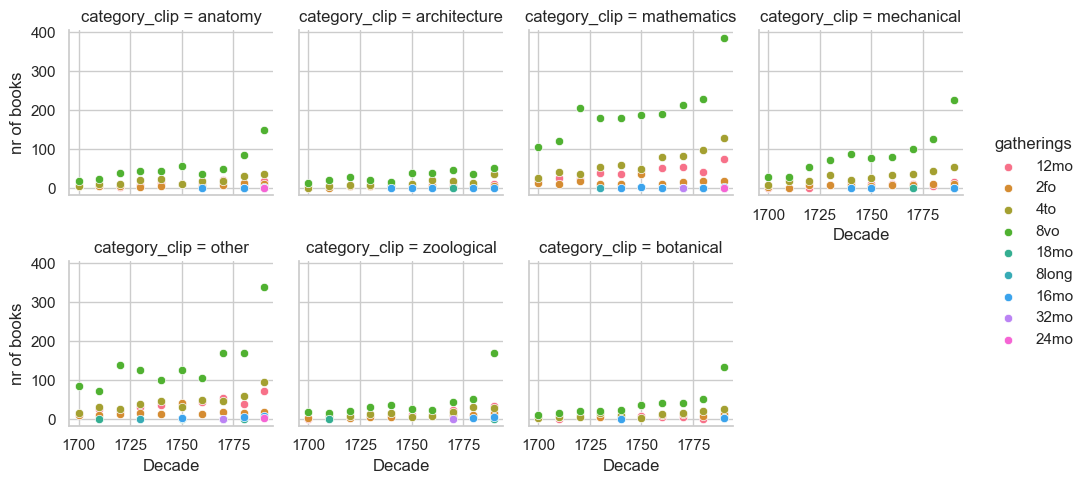

In [57]:
# in which category do the pictures appear?

classes = df_m["category_clip"].unique()
print(classes)
# group by category
fdf2 = data.groupby(["publication_decade","gatherings","category_clip"])["ecco_id"].nunique().reset_index()

#col="size", height=2.5, col_wrap=3
mycolors={c:"r" for c in classes}
g = sns.FacetGrid(fdf2[(fdf2["publication_decade"]< 1800)&(fdf2["publication_decade"]> 1690)], col="category_clip", col_wrap=4, height=2.5, hue="gatherings")
g.map(sns.scatterplot, "publication_decade", "ecco_id").add_legend()
g.set_axis_labels(x_var="Decade", y_var="nr of books")
g.tight_layout()

#g.savefig("output/gatherings.png", bbox_inches="tight")
# show the object

In [63]:
# group by category
fdf2 = df_f.groupby(["publication_year","publication_decade","gatherings","category_clip","ecco_id"]).size().reset_index(name="pics")
fdf3=fdf2.groupby(["publication_year","category_clip","gatherings"])["pics"].sum().reset_index()


In [64]:
fdf2.groupby(["gatherings"])["pics"].mean()# mean nr of pictures per format

gatherings
12long     3.000000
12mo       9.501762
16mo      11.540000
18mo       3.037037
24mo       6.857143
2fo       22.623514
32mo       9.230769
4to       15.666511
8long      3.666667
8vo       11.864754
Name: pics, dtype: float64

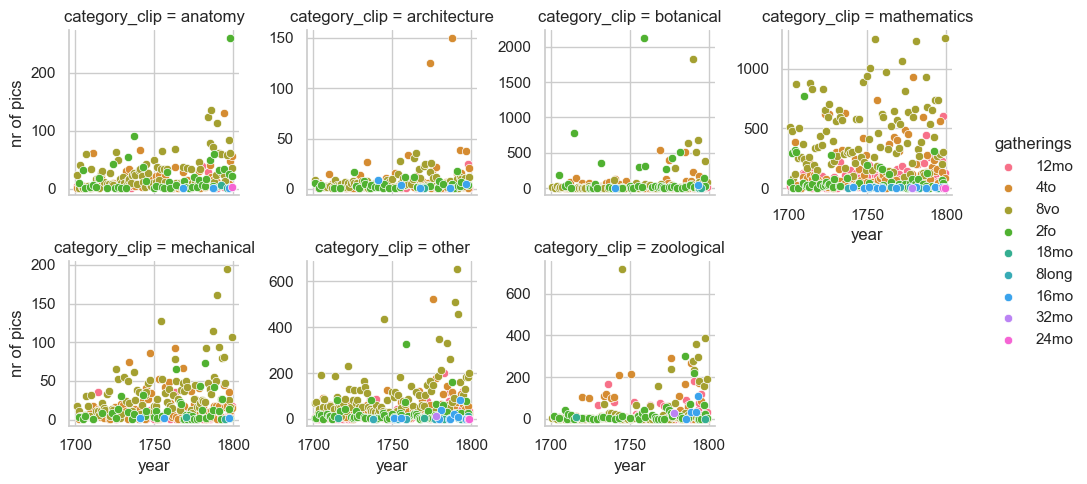

In [61]:
# messy plot

mycolors={c:"r" for c in classes}
g = sns.FacetGrid(fdf3[(fdf3["publication_year"]< 1800)&(fdf3["publication_year"]> 1699)], col="category_clip", col_wrap=4, height=2.5, hue="gatherings",sharey=False)
g.map(sns.scatterplot, "publication_year", "pics" ).add_legend() #,errorbar="sd"
#g.map(sns.scatterplot, "publication_year","gatherings", size=200 ).add_legend()
g.set_axis_labels(x_var="year", y_var="nr of pics")
g.tight_layout()

#g.savefig("output/gatherings_pics.png", bbox_inches="tight")

In [62]:
# the botanical folio
fdf2[fdf2["category_clip"]=="botanical"].sort_values("pics",ascending=False).head(15)

,publication_year,publication_decade,gatherings,category_clip,ecco_id,pics
697,1715.0,1710.0,2fo,botanical,0490300103,412
7123,1785.0,1780.0,4to,botanical,1200400101,391
5299,1769.0,1760.0,4to,botanical,0549200300,351
9752,1798.0,1790.0,8vo,botanical,0282800800,350
696,1715.0,1710.0,2fo,botanical,0490300102,346
6786,1782.0,1780.0,2fo,botanical,1154800301,262
6787,1782.0,1780.0,2fo,botanical,1154800302,245
6241,1777.0,1770.0,2fo,botanical,0905100101,243
3953,1756.0,1750.0,2fo,botanical,1186500100,238
5984,1775.0,1770.0,4to,botanical,0317500104,198


In [198]:
print(df_m[df_m["ecco_id"]=="0490300103"][["ecco_full_title","authors"]].head(1).values)

print(df_m[df_m["ecco_id"]=="1154800301"][["ecco_full_title","authors"]].head(1).values)

print(df_m[df_m["ecco_id"]=="1154800302"][["ecco_full_title","authors","page_id", "gatherings"]].head(1).values)

print(df_m[df_m["ecco_id"]=="1200400101"][["ecco_full_title","authors","page_id", "gatherings"]].head(1).values)



[['Plantarum historiae universalis Oxoniensis seu herbarum distributio nova, per tabulas cognationis & affinitatis ex libro naturae observata & detecta. Auctore Roberto Morison Medico & Professore Botanico Regio, nec non Inclytae & Celeberrimae Universitatis Oxoniensis P.B. ejusdemque Hort. Botan. Praefecto primo. ...'
  'Morison, Robert, 1620-1683.']]
[['A curious herbal, containing five hundred cuts, of the most useful plants, which are now used in the practice of physick. Engraved on folio copper plates, after drawings taken from the life. By Elizabeth Blackwell. To which is added a short description of ye plants; and their common uses in phsick. ...'
  'Blackwell, Elizabeth, active 1737.']]
[['A curious herbal, containing five hundred cuts, of the most useful plants, which are now used in the practice of physick. Engraved on folio copper plates, after drawings taken from the life. By Elizabeth Blackwell. To which is added a short description of ye plants; and their common uses in p

In [216]:
# check this folio
df_f.drop_duplicates("work_id").dropna(subset=["ecco_full_title","authors"])[df_f.dropna(subset=["ecco_full_title","authors"])["authors"].str.contains("Morison")].sort_values("publication_year")#[["ecco_full_title","authors","page_id", "gatherings"]]

C:\Users\telmi\AppData\Local\Temp\ipykernel_5632\947739276.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f.drop_duplicates("work_id").dropna(subset=["ecco_full_title","authors"])[df_f.dropna(subset=["ecco_full_title","authors"])["authors"].str.contains("Morison")].sort_values("publication_year")#[["ecco_full_title","authors","page_id", "gatherings"]]


,page_allas_url,illustration_id,page_id,illustration_allas_url,ecco_id,page_number,allas_page_url,caption_texts,estc_id,ecco_full_title,...,document_type,sub_category,authors,category_clip,score_clip,category_em,cat,score,num_cat,num_format
58531,049030010100100_0.png,049030010100100_0,049030010100100,https://a3s.fi/dhh23-em-illu/049030010100100_0.png,0490300101,10.0,https://a3s.fi/dhh23-em-pages/049030010100100.png,TABULA GENERALIS ICONUM SEMINUM UMBELLARUM.,N20793,"Plantarum historiae universalis Oxoniensis seu herbarum distributio nova, per tabulas cognationis & affinitatis ex libro naturae observata & detecta. Auctore Roberto Morison Medico & Professore Botanico Regio, nec non Inclytae & Celeberrimae Universitatis Oxoniensis P.B. ejusdemque Hort. Botan. Praefecto primo. ...",...,Book,scientificimprovementnaturalhistory,"Morison, Robert, 1620-1683.",mathematics,48.120117,Other,mechnanical_tools,76.025391,6,5


In [227]:
for val in df_f.drop_duplicates("page_id").dropna(subset=["ecco_full_title","authors"])[df_f.dropna(subset=["ecco_full_title","authors"])["authors"].str.contains("Blackwell")]["page_id"].sample(50).values:
    print("https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/"+val+"?format=png")
    
    #[["ecco_full_title","authors","page_id", "gatherings"]]

https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030101380?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030102260?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030200250?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030200340?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030102730?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030101770?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030201400?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030200130?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030201420?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030200940?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030100120?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030202940?format=png
https://callisto.ggsrv.com/imgsrv/FastFetch/UBER2/115480030202600?format=png

C:\Users\telmi\AppData\Local\Temp\ipykernel_5632\2190858082.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for val in df_f.drop_duplicates("page_id").dropna(subset=["ecco_full_title","authors"])[df_f.dropna(subset=["ecco_full_title","authors"])["authors"].str.contains("Blackwell")]["page_id"].sample(50).values:


In [222]:
##

df_f.columns

Index(['page_allas_url', 'illustration_id', 'page_id',
       'illustration_allas_url', 'ecco_id', 'page_number', 'allas_page_url',
       'caption_texts', 'estc_id', 'ecco_full_title', 'number_of_pages',
       'language_primary', 'gatherings', 'publication_year',
       'publication_decade', 'work_id', 'publication_place',
       'publication_country', 'document_type', 'sub_category', 'authors',
       'category_clip', 'score_clip', 'category_em', 'cat', 'score', 'num_cat',
       'num_format'],
      dtype='object')



## Botanics and zoology

In [195]:
pd.set_option('display.max_colwidth', None)
bot = df_f[df_f["cat"].isin(["zoo_1","zoo_2"])]
print(bot.columns)
bot[(bot["ecco_full_title"].str.contains("Linnae"))&(bot["gatherings"]=="8vo")].drop_duplicates("work_id")[["publication_year","ecco_full_title","allas_page_url","page_id"]].sort_values("publication_year")


Index(['page_allas_url', 'illustration_id', 'page_id',
       'illustration_allas_url', 'ecco_id', 'page_number', 'allas_page_url',
       'caption_texts', 'estc_id', 'ecco_full_title', 'number_of_pages',
       'language_primary', 'gatherings', 'publication_year',
       'publication_decade', 'work_id', 'publication_place',
       'publication_country', 'document_type', 'sub_category', 'authors',
       'category_clip', 'score_clip', 'category_em', 'cat', 'score', 'num_cat',
       'num_format'],
      dtype='object')


,publication_year,ecco_full_title,allas_page_url,page_id
152722,1760.0,"Flora Britanica: sive, synopsis methodica stirpium Britanicarum. Sistens, Arbores et Herbas, indigenas et in agris cultas in Classes et Ordines, Genera et Species redactas Secundum Systema Sexuale: Additis nonnullis noviter detectis. cum classium, ordinum, et generum characteristicis, Specierum descriptionibus, et virium Epitome. tabulis aeneis illustrata. Post tertiam Editionem Synopseos Raianae, opere Dillenii concinnatam, nunc primum ad celeberrimi Caroli Linnaei methodum disposita. Auctore Johanne Hill, M. D. Societatis regiae Burdigalensis, &c. Soc.",https://a3s.fi/dhh23-em-pages/129440010000160.png,129440010000160
25122,1772.0,"Fundamenta entomologiæ: or, an introduction to the knowledge of insects. Being a translation of the Fundamenta Entomologiae of Linnaeus, farther Illustrated with Copper Plates and Additions. By W. Curtis, Apothecary.",https://a3s.fi/dhh23-em-pages/020630110000040.png,020630110000040
46059,1778.0,"A botanical dictionary: or elements of systematic and philosophical botany. Containing Descriptions of the Parts of Plants-an Explanation of the scientific Terms used by Morison, Ray, Tournefort, Linnaeus, and other eminent Botanists-a brief Analysis of the principal Systems in Botany-a critical Enquiry into the Merits and Defects of the Linnaean Method of Arrangement, and Distribution of the Genera-Descriptions of the various Tribes, or natural Families of Plants, their Habit and Structure, Virtues, sensible Qualities, and oeconomical Uses-an impartial Examination of the Doctrine of the Sex of Plants-With a Discussion of several curious Questions in the Vegetable Oeconomy, connected with Gardening. The whole forming a complete system of botanical knowledge. By Colin Milne, LL.D.",https://a3s.fi/dhh23-em-pages/037750120005140.png,037750120005140
55200,1787.0,"The botanical Magazine; or, Flower-Garden Displayed: in which the most ornamental foreign plants, cultivated in the Open Ground, the Green-House, and the Stove, will be accurately represented in their natural colours. To which will be added, Their Names, Class, Order, Generic and Specific Characters, according to the celebrated Linnaeus; their Places of Growth, and Times of Flowering: Together with the most approved methods of Culture. A work Intended for the Use of Such Ladies, Gentlemen, and Gardeners, as wish to become scientifically acquainted with the Plants they cultivate.",https://a3s.fi/dhh23-em-pages/046120010100700.png,046120010100700
67241,1792.0,"Flora rustica: exhibiting accurate figures of such plants as are either useful or injurious in husbandry. Drawn and engraved by Frederick P. Nodder, Botanic Painter to Her Majesty, and coloured under his inspection. With scientific characters, popular descriptions, and useful observations, by Thomas Martyn, B. D. and F. R. S. Fellow of the Linnaean Society, and Professor of Botany in the University of Cambridge. ...",https://a3s.fi/dhh23-em-pages/054890050100190.png,054890050100190
115194,1793.0,"The botanical magazine; or, Flower-Garden Displayed: in which the most ornamental foreign plants, cultivated in the Open Ground, the Green-House, and the Stove, are accurately represented in their natural colours. To which are added, their names, Class, Order, Generic and Specific Characters, according to the celebrated Linnaeus; their Places of Growth, and Times of Flowering: together with the most approved methods of culture. A work Intended for the Use of such Ladies, Gentlemen, and Gardeners, as wish to become scientifically acquainted with the Plants they cultivate. By William Curtis, Author of the Flora Londinensis. Vol. I.",https://a3s.fi/dhh23-em-pages/097220010300330.png,097220010300330
116537,1796.0,"An arrangement of British plants; according to the latest improvements of the Linnæan system. To which is prefixed, An easy introduction to the study of botany. Illustrated by copper plates. By William Withering, M. D. F. R. S.

In [193]:
bot[(bot["ecco_full_title"].str.contains("Linnae"))&(bot["gatherings"]=="2fo")].drop_duplicates("work_id")[["publication_year","ecco_full_title","allas_page_url","page_id"]].sort_values("publication_year")


,publication_year,ecco_full_title,allas_page_url,page_id
71562,1756.0,"Eden: or, a compleat body of gardening. Containing plain and familiar directions for raising the several useful products of a garden, fruits, roots, and herbage; From the Practice of the most successful Gardeners, and The Result of a Long Experience. Together with The Culture of all Kinds of Flowers, according to the Methods of the English, French, and Dutch Florists. And The Knowledge of Curious Plants, after the System of Linnaeus. With Figures and Descriptions of the Flowers and Plants proper for a Garden, including The Care and Culture of the Pleasure-Garden. The Business of the seminary for every Week in the Year. Catalogues and accurate Descriptions of the fruits as they come into Season; and New and Practical Directions for the Management of fruit-trees. With the best Methods of Culture for The several Articles of the Kitchen-Garden: and the Compleat Management of the Ground for raising them, in the Natural and Artificial Manner. Compiled and digested from the papers of the late celebrated Mr. Hale, by the authors of the Compleat body of husbandry. And comprehending The Art of constructing a garden for Use and Pleasure; The best Methods of keeping it in Order: and The most perfect Accounts of its several products.",https://a3s.fi/dhh23-em-pages/058050020006820.png,058050020006820
136908,1760.0,"Figures of the most beautiful, useful, and Uncommon plants described in The Gardeners dictionary, exhibited on Three Hundred Copper Plates, Accurately Engraven after drawings taken from nature. With The Characters of their Flowers and Seed-Vessels, Drawn when they were in their greatest Perfection. To which are added, Their Descriptions, and an Account of the Classes to which they belong, according to Ray's, Tournefort's, and Linnaeus's Method of Classing them. By Philip Miller, F. R. S. Member of the Botanic Academy at Florence, and Gardener to the Worshipful Company of Apothecaries at their Botanic Garden at Chelsea. In Two Volumes. ...",https://a3s.fi/dhh23-em-pages/115850020100460.png,115850020100460
75812,1766.0,"The complete farmer: or, a general dictionary of husbandry, in all its branches; Containing the Various Methods of Cultivating and Improving every Species of Land, According to the Precepts of both the old and new Husbandry. In which every Thing valuable from the best Writers on this Subject will be extracted, viz. Linnaeus, Chateauvieux, the Marquis of Turbilly, Platt, Evelyn, Worlidge, Mortimer, Tull, Ellis, Miller, Hale, Lisle, Roque, Mills, &c. Together with A Great variety of new discoveries and improvements. Also The Whole Business of Breeding, Managing, and Fattening Cattle of all Kinds; and the most approved Methods of curing the various Diseases to which they are subject. Together with the Method of raising Bees, and of acquiring large Quantities of Wax and Honey, without destroying those laborious Insects. Likewise the useful Parts of Gardening; or those necessary for the Farmer, and Country Gentleman. Illustrated with a great Variety of Folio Copper-Plates, finely engraved; exhibiting all the Instruments used in this necessary Art; particularly those lately invented, and presented to the Society for the Encouragement arts, &c. in London; many of which have never yet appeared in any Work of this Nature. By a society of gentlemen, Members of the Society for the Encouragement of Arts, Manufactures, and Commerce.",https://a3s.fi/dhh23-em-pages/061910040001490.png,061910040001490
89077,1773.0,"One hundred and twenty copper-plates of English moths and butterflies, representing Their Changes into the Caterpillar, Chrysalis, and Fly States, and the plants, flowers, and fruits, whereon they feed. Coloured with great Exactness from the Subjects themselves. With a Natural History of the Moths and Butterflies, Describing the Method of Managing, Preserving, and Feeding them. By Benjamin Wilkes. To which is added, An Index of the Insects and Plants,

In [312]:
# misc
pics = pd.read_csv("data/pics2try.csv",header=None).rename({0:"url",1:"author"}, axis=1)
print(len(pics))
pics["pic_id"] = pics["url"].apply(lambda x: x.split("/")[-1])
pics["pic_id"] = pics["pic_id"].apply(lambda x: x.split("?")[0])
pics2=pics.merge(df_m, left_on="pic_id", right_on="page_id", how="left").drop_duplicates("pic_id")
print(len(pics2))

pics2.to_csv("data/pic_sample.csv")

53
53
